In [1]:
import numpy as np
import pandas as pd

In [2]:
neurons = pd.read_csv('neurons.csv',index_col=0)
images = pd.read_csv('images.csv',index_col=0)
images = images.set_index('images')
#mean_response_arr = np.load('mean_responses.npy')
experiments = pd.read_pickle('df_session_B_all.pkl')

In [4]:
print len(experiments)
experiments.head()

112


,age_days,cre_line,id,imaging_depth,targeted_structure,session_B_id,n_cells
0,143.0,Cux2-CreERT2,511510695,175,VISal,503820068,90
1,98.0,Scnn1a-Tg3-Cre,511510911,350,VISp,508596945,200
2,80.0,Rbp4-Cre_KL100,511511015,375,VISpm,510706209,60
3,152.0,Cux2-CreERT2,511510736,175,VISp,501559087,173
4,136.0,Rorb-IRES2-Cre,530739574,275,VISp,531124922,149


In [4]:
experiments.groupby('targeted_structure').size()

targeted_structure
VISal    17
VISl     16
VISp     58
VISpm    21
dtype: int64

In [5]:
#so cool
experiments.groupby('targeted_structure')['n_cells'].describe()

,count,mean,std,min,25%,50%,75%,max
targeted_structure,,,,,,,,
VISal,17.0,136.647059,54.520571,50.0,90.00,158.0,171.00,238.0
VISl,16.0,162.875000,74.708210,40.0,112.25,172.5,207.25,304.0
VISp,58.0,188.310345,95.978471,41.0,102.50,178.5,262.00,433.0
VISpm,21.0,102.714286,54.511598,31.0,73.00,89.0,125.00,238.0


In [6]:
print len(neurons)
neurons.head()

18008


,cell_id,data_index,experiment
0,541510796,0,541206592
1,541510564,1,541206592
2,541510300,2,541206592
3,541509854,3,541206592
4,541510823,4,541206592


In [7]:
#join relys on the indices
#merge is for matching columns
#left_on and right_on are what I am looking for
#on if both are the same column
neurons = neurons.merge(experiments,left_on='experiment',right_on='session_B_id')
neurons.head()

,cell_id,data_index,experiment,age_days,cre_line,id,imaging_depth,targeted_structure,session_B_id,n_cells
0,541510796,0,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
1,541510564,1,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
2,541510300,2,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
3,541509854,3,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
4,541510823,4,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154


In [8]:
neurons.head()

,cell_id,data_index,experiment,age_days,cre_line,id,imaging_depth,targeted_structure,session_B_id,n_cells
0,541510796,0,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
1,541510564,1,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
2,541510300,2,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
3,541509854,3,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154
4,541510823,4,541206592,130.0,Scnn1a-Tg3-Cre,540993888,350,VISp,541206592,154


In [9]:
mean_population_response = mean_response_arr.mean(axis=0)
# mean_population_response = mean_population_response - mean_population_response[:,0][:,None]

NameError: name 'mean_response_arr' is not defined

In [19]:
trained_images = [62,63,77,66,69,85,65,61]

In [20]:
def get_mean_population_response(image,region):
    
    cell_indices = neurons[neurons['targeted_structure']==region].index
    idx = images['data_index'][image]
    response = mean_response_arr[cell_indices,:,idx]
    return response[:,30:].mean()

In [21]:
beh_data = [ 0.91424108,  0.52868822,  0.616308  ,  0.79409096,  0.74387009,
        0.92485984,  0.51817773,  0.74289948]
beh_data_idx = [61, 62, 63, 65, 66, 69, 77, 85]
old_beh_data = {k:v for k,v in zip(beh_data_idx,beh_data)}

In [22]:
images_annotated = images.reset_index()

In [23]:
images_annotated['behavioral_detectability'] = images_annotated['images'].map(old_beh_data)
for region in neurons['targeted_structure'].unique():
    images_annotated[region] = images_annotated.apply(
        lambda row: get_mean_population_response(row['images'],region),
        axis=1,
    )

NameError: ("global name 'mean_response_arr' is not defined", u'occurred at index 0')

In [24]:
images_annotated.head()

,images,data_index,behavioral_detectability
0,-1,0,NaN
1,0,1,NaN
2,1,2,NaN
3,2,3,NaN
4,3,4,NaN


In [25]:
image_mask = (
    ~pd.isnull(images_annotated['behavioral_detectability'])
)

behavioral_predictions = pd.melt(
    images_annotated[image_mask],
    id_vars='behavioral_detectability',
    value_vars=['VISp','VISl','VISal','VISpm'],
    value_name='mean_response',
    var_name='region',
).reset_index()
behavioral_predictions.head()

,index,behavioral_detectability,region,mean_response
0,0,0.914241,VISp,NaN
1,1,0.528688,VISp,NaN
2,2,0.616308,VISp,NaN
3,3,0.794091,VISp,NaN
4,4,0.743870,VISp,NaN


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

ValueError: low >= high

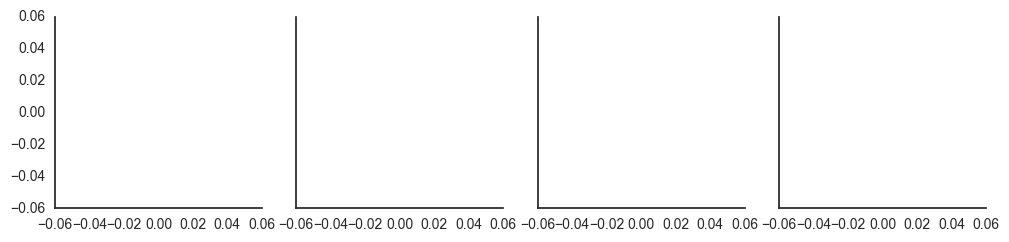

In [27]:
fp = sns.lmplot('mean_response','behavioral_detectability',data=behavioral_predictions,
           col='region',
           hue='region',
           col_order= ['VISp','VISl','VISal','VISpm'],
           size=2.5,
              )
fp.axes[0,0].set_xlim(-0.008,0.008)
fp.axes[0,0].set_ylim(0,1.5)
fp.axes[0,0].set_xticks(np.linspace(-0.005,0.005,3))

## select images VISpm distribution to train animals on

In [28]:
images_annotated['prior_training'] = ~pd.isnull(images_annotated['behavioral_detectability'])

In [29]:
lower = images_annotated[images_annotated['prior_training']]['VISpm'].min()
upper = images_annotated[images_annotated['prior_training']]['VISpm'].max()
print lower, upper

KeyError: 'VISpm'

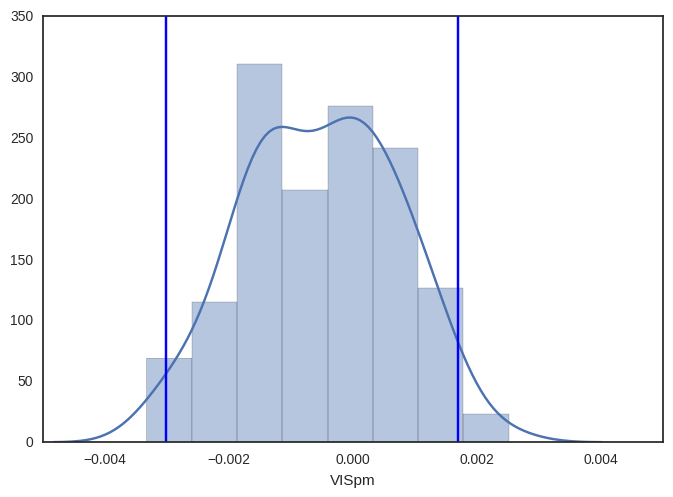

In [21]:
sns.distplot(images_annotated['VISpm'])
plt.axvline(lower)
plt.axvline(upper)

In [22]:
sampling_bins = np.linspace(lower,upper,9)
print sampling_bins

[ -3.01177893e-03  -2.42453936e-03  -1.83729979e-03  -1.25006022e-03
  -6.62820647e-04  -7.55810761e-05   5.11658494e-04   1.09889806e-03
   1.68613764e-03]


In [23]:
from itertools import tee,izip
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return izip(a, b)

In [24]:
images_annotated.columns

Index([                  u'images',               u'data_index',
       u'behavioral_detectability',                     u'VISp',
                           u'VISl',                    u'VISpm',
                          u'VISal',           u'prior_training'],
      dtype='object')

In [25]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
boc = BrainObservatoryCache(manifest_file='boc_all/manifest.json')
exp = boc.get_ophys_experiment_data(541206592)

stim_templates = exp.get_stimulus_template(u'natural_scenes')

ImportError: No module named allensdk.core.brain_observatory_cache

In [ ]:
candidates = []
for left,right in pairwise(sampling_bins):
    print left,right
    
    mask = (
        (images_annotated['VISpm'] > left) 
        & (images_annotated['VISpm'] < right) 
        & pd.isnull(images_annotated['behavioral_detectability']) # exclude prior training
        )
    print len(images_annotated[mask])
    candidates.append(
        images_annotated[mask].sample()['images'].values[0]
        )

fig,ax = plt.subplots(1,8)
fig.set_size_inches(16,3)
for i,img in enumerate(candidates):
    ax[i].imshow(stim_templates[img],cmap='gray')
    ax[i].set_title(str(img))
    ax[i].axis('off')

In [ ]:
print candidates

In [ ]:
images_annotated['candidates'] = images_annotated['images'].isin(candidates)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
training_mask = images_annotated['prior_training']

X = images_annotated[training_mask]['VISpm'].values.reshape(-1,1)
y = images_annotated[training_mask]['behavioral_detectability']

lm = LinearRegression()
lm.fit(X,y)

In [ ]:
images_annotated['predicted_discrim'] = lm.predict(images_annotated['VISpm'].values.reshape(-1,1))

In [ ]:
plt.scatter(X,y)
plt.scatter(images_annotated['VISpm'],images_annotated['predicted_discrim'],color='0.5')
mask = images_annotated['candidates']
plt.scatter(images_annotated[mask]['VISpm'],images_annotated[mask]['predicted_discrim'],color='r',s=100)
plt.xlim(-0.004,0.004)